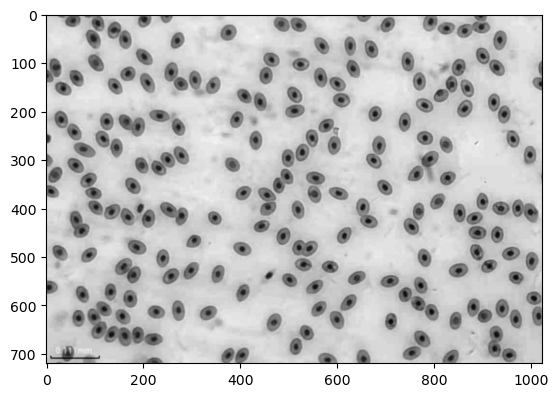

In [1]:
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as ss
import scikit_posthocs as sp
from skimage import measure, morphology
from skimage.color import rgb2gray
from skimage.filters import (gaussian, threshold_yen)
from skimage.measure import regionprops_table


path = '/Users/User/Documents/Microscopy2Coursework'

imagename = '270123_BirdBlood_20x_1' # microscope image file name

image = imageio.imread(imagename+'.jpg')

#image processing - convert to greyscale and perform gaussian filtering

img = rgb2gray(image)
img= gaussian(img, sigma=1)

#show image

plt.imshow(img, cmap='gray')

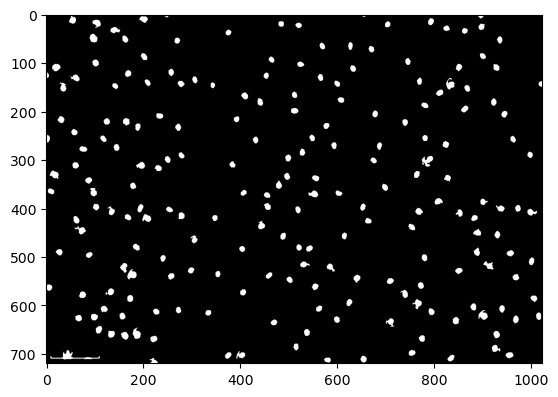

In [5]:
# Binary image, post-process the binary mask and compute labels
block_size = 51 # this is the size of the window for adaptive thresholding

threshold = threshold_yen(img, block_size)
mask = img < threshold*1  #adjust factor as needed

mask = morphology.remove_small_objects(mask, 35) #removing objects to single out the nuclei
mask = morphology.remove_small_holes(mask, 1000)
plt.imshow(mask, cmap='gray')

In [3]:
#measure nuclei area and shape data and save to array props1
labels = measure.label(mask)
props1 = regionprops_table(labels, properties=('area','perimeter','eccentricity','solidity'))
dataframe = pd.DataFrame(props1)
dataframe

area  perimeter  eccentricity  solidity
0      63  30.520815      0.823767  0.969231
1      51  26.485281      0.846311  0.962264
2      82  31.899495      0.616413  0.987952
3     166  54.870058      0.494391  0.878307
4     166  48.627417      0.669197  0.922222
..    ...        ...           ...       ...
204   151  43.798990      0.669866  0.961783
205   134  42.627417      0.770157  0.950355
206   135  41.213203      0.440643  0.944056
207   112  37.556349      0.684577  0.957265
208    98  47.177670      0.811475  0.816667

[209 rows x 4 columns]

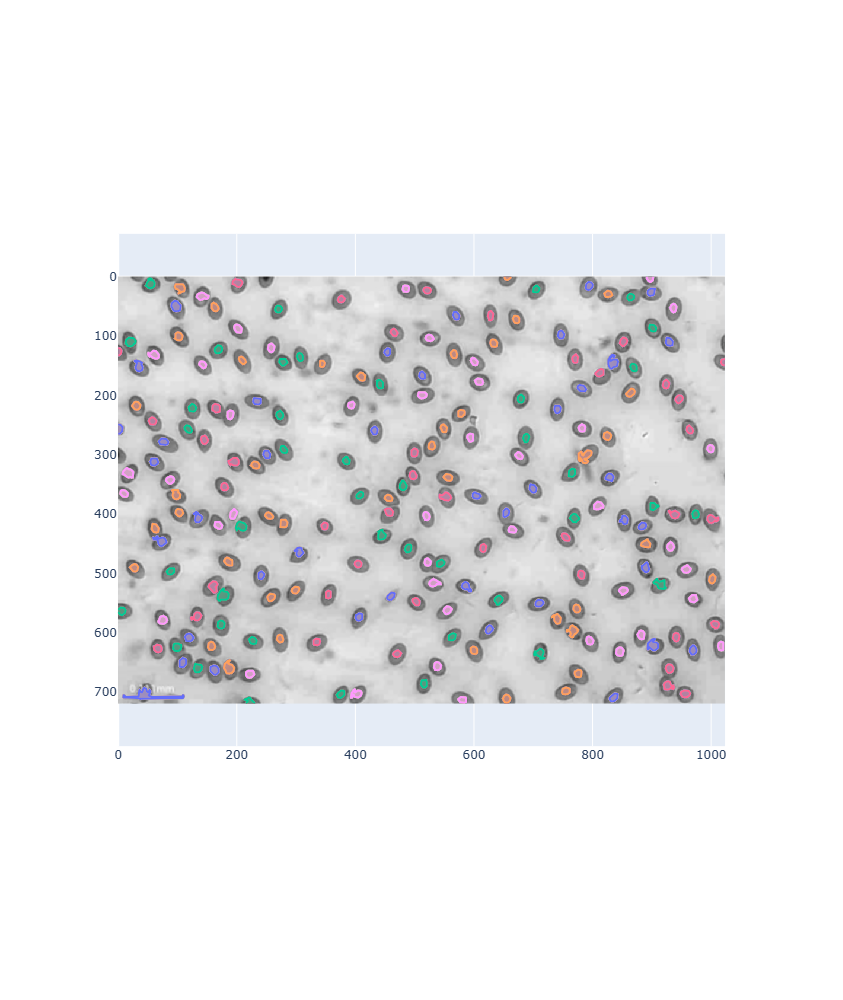

In [4]:
#convert array to csv and save to "shapedata" in path specified above

dataframe.to_csv(imagename+'nuclear_shapedata.csv', encoding='utf-8', index=False)

#generate interactive image to display data on cells when hovering over the cells

fig = px.imshow(img, binary_string=True, width=1400, height=1000)
fig.update_traces(hoverinfo='skip') # hover is only for label info
props = measure.regionprops(labels, img)
properties = ['area','perimeter','eccentricity','solidity']
for index in range(1, labels.max()):
 label_i = props[index].label
 contour = measure.find_contours(labels == label_i, 0.5)[0]
 y, x = contour.T
 hoverinfo = ''
 for prop_name in properties:
    hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(x=x, y=y, name=label_i, mode='lines', fill='toself', showlegend=False, hovertemplate=hoverinfo, hoveron='points+fills'))
     
#show interactive figure and save to html
plotly.io.show(fig)
fig.write_html(imagename+"nuclei.html")

In [3]:
filename1 = '270123_FishBlood_20x_1nuclear_shapedata.csv'
filename12 = '270123_FishBlood_20x_2nuclear_shapedata.csv'
filename13 = 'EC_FishBlood_20x_1nuclear_shapedata.csv'
filename14 = 'EC_FishBlood_20x_4nuclear_shapedata.csv'

filename2 = '270123_BirdBlood_20x_1nuclear_shapedata.csv'
filename22 = '270123_BirdBlood_20x_2nuclear_shapedata.csv'
filename23 = 'EC_BirdBlood_20x_3nuclear_shapedata.csv'
filename24 = 'EC_BirdBlood_20x_4nuclear_shapedata.csv'

filename3 = '270123_FrogBlood_20x_1nuclear_shapedata.csv'
filename32 = 'EC_FrogBlood_20xnuclear_shapedata.csv'
filename33 = 'EC_FrogBlood_20x_3nuclear_shapedata.csv'
filename34 = 'EC_FrogBlood_20x_4nuclear_shapedata.csv'

df1 = pd.read_csv(filename1) #scale bar included in mainbird csv file
df12 = pd.read_csv(filename12)
df13 = pd.read_csv(filename13)
df14 = pd.read_csv(filename14)

df2 = pd.read_csv(filename2)
df22 = pd.read_csv(filename22)
df23 = pd.read_csv(filename23)
df24 = pd.read_csv(filename24)

df3 = pd.read_csv(filename3)
df32 = pd.read_csv(filename32)
df33 = pd.read_csv(filename33)
df34 = pd.read_csv(filename34)


allFish=pd.concat([df1,df12,df13,df14])

allBird=pd.concat([df2,df22,df23,df24])

allFrog=pd.concat([df3,df32,df33,df34])

scale = 3.3815 # pixels/um

Areas= [allFish["area"],allBird["area"],allFrog["area"]]
Eccentricities= [allFish["eccentricity"],allBird["eccentricity"],allFrog["eccentricity"]]# repeat the same for perimeter, eccentricity, and solidity
Perimeters= [allFish["perimeter"],allBird["perimeter"],allFrog["perimeter"]]
Solidities = [allFish["solidity"],allBird["solidity"],allFrog["solidity"]]

Areas_µm2 = [value * (1/scale)**2 for value in Areas] #change “factor” to conversion factor; same for perimeter
Perimeters_µm = [value * (1/scale) for value in Perimeters]

for df in Areas_µm2:
    print(df.mean(),df.median(),df.std(),df.count())

11.483070753878412 10.844334411375321 3.7485946245414365 1449
11.882269511680853 11.369060269990257 3.2235873177726178 729
72.81227590968551 31.658460136434407 75.77487141050109 553


In [4]:
for df in Perimeters_µm:
    print(df.mean(),df.median(),df.std(),df.count())

12.191564667852445 11.59639314966625 3.1117500176648747 1449
12.740651071482592 12.116091305183241 3.7548541031724074 729
31.633310659533002 22.28458940095442 17.991223975523283 553


In [5]:
for df in Eccentricities:
    print(df.mean(),df.median(),df.std(),df.count())

0.546689927943058 0.5458150475424374 0.16779840403893964 1449
0.6138811633937982 0.6331483441974801 0.13719203009462355 729
0.7741918484851419 0.7918199035544911 0.10244604229333212 553


In [6]:
for df in Solidities:
    print(df.mean(),df.median(),df.std(),df.count())

0.9495814725668397 0.956043956043956 0.03916626540278417 1449
0.9391926424705994 0.950413223140496 0.049486040979325845 729
0.9355452778745998 0.9473684210526316 0.04728190218205494 553


In [9]:
# repeat the same for the other measurements
#plt.boxplot(Areas_µm2,
            #labels= ['Fish', 'Bird', 'Frog'],
            #showmeans= True)
        
#plt.boxplot(Eccentricities,
            #labels= ['Fish', 'Bird', 'Frog'],
            #showmeans= True)

#plt.boxplot(Perimeters_µm,
            #labels= ['Fish', 'Bird', 'Frog'],
            #showmeans= True)

#plt.boxplot(Solidities,
            #labels= ['Fish', 'Bird', 'Frog'],
            #showmeans= True)



s1 = ss.f_oneway(allBird["area"],allFish["area"],allFrog["area"]) # etc for the other measurements
s2 = ss.f_oneway(allBird["perimeter"],allFish["perimeter"],allFrog["perimeter"])
s3 = ss.f_oneway(allBird["eccentricity"],allFish["eccentricity"],allFrog["eccentricity"])
s4 = ss.f_oneway(allBird["solidity"],allFish["solidity"],allFrog["solidity"])
#comment: write this into a variable and use print for output
print(s1)
print(s2)
print(s3)
print(s4)

sp1 = sp.posthoc_mannwhitney(Areas, p_adjust = 'bonferroni') #etc. for the other measurements
sp2 = sp.posthoc_mannwhitney(Perimeters, p_adjust = 'bonferroni')
sp3 = sp.posthoc_mannwhitney(Eccentricities, p_adjust = 'bonferroni')
sp4 = sp.posthoc_mannwhitney(Solidities, p_adjust = 'bonferroni')
#comment: see above
print(sp1)
print(sp2)
print(sp3)
print(sp4)

F_onewayResult(statistic=704.5938592161588, pvalue=2.0220220144779338e-247)
F_onewayResult(statistic=1100.2131567303798, pvalue=0.0)
F_onewayResult(statistic=469.0883808519503, pvalue=8.028551854438778e-176)
F_onewayResult(statistic=26.43470828680826, pvalue=4.259733932919401e-12)
               1              2              3
1   1.000000e+00   1.042186e-09  3.160154e-258
2   1.042186e-09   1.000000e+00  1.611840e-201
3  3.160154e-258  1.611840e-201   1.000000e+00
               1              2              3
1   1.000000e+00   6.673614e-18  9.919326e-254
2   6.673614e-18   1.000000e+00  3.632106e-197
3  9.919326e-254  3.632106e-197   1.000000e+00
               1             2              3
1   1.000000e+00  3.450693e-19  6.218847e-152
2   3.450693e-19  1.000000e+00   4.602833e-99
3  6.218847e-152  4.602833e-99   1.000000e+00
              1             2             3
1  1.000000e+00  8.677727e-10  7.899649e-30
2  8.677727e-10  1.000000e+00  5.521329e-05
3  7.899649e-30  5.521329e